In [37]:
# importing the 
import requests
import zipfile
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb

In [ ]:
# Step 1 : For downloading file
for year in range(1975,2021,5):
    
    # Making the url and filename with year substituion
    url = f"https://static.nhtsa.gov/nhtsa/downloads/FARS/{year}/National/FARS{year}NationalCSV.zip"
    filename = f"FARS{year}NationalCSV.zip"
    
    print(f'Start downloading file for year : {year}')
    
    # Calling requests library/module to download the url
    r = requests.get(url, allow_redirects=True)
    
    # opening a file for writing 
    # 'wb': for writing byte mod
    # 'w' : writing file in string mode
    with open(filename,'wb') as f:
        f.write(r.content)
    
    print(f'Download completed for year :{year}')

In [ ]:
# Step 2 : To uncompress the files into year directory

# Use os module to generate/create directory with year
for year in range(1975,2021,5):
    directory = f'{year}'
    # os module has path submodule
    # which has a function exists
    # this function checks if path/directory exists : returns true
    # else it returns false
    if not os.path.exists(directory):
        # in os module, mkdir function creates the 
        # path/directory passed to it
        os.mkdir(directory)

In [ ]:
for year in range(1975,2021,5):
    filename = f"FARS{year}NationalCSV.zip"
    directory = f'{year}'
    
    # calling a ZipFile function from zipfile module
    # to open a zip file
    with zipfile.ZipFile(filename, 'r') as z:
        
        # calling extractall function to extract all zip
        # files into argument passed as directory
        z.extractall(directory)

In [2]:
# Step 3 : copying all accident.csv files into directory accident_all_years
newDir = "accident_all_years"
if not os.path.exists(newDir):
    os.mkdir(newDir)

In [ ]:
for year in range(1975,2021,5):
    for file in [ 'ACCIDENT.CSV' ,'accident.csv', 'accident.CSV' ]:
        oldPath = f'{year}/{file}'
        newPath = f'{newDir}/{year}_accident.csv'
        if os.path.exists(oldPath):
            shutil.copy(oldPath,newPath)

In [2]:
totalAccidents = 0
fatalAccidents = 0

# iterating over all files from 1975 to 2020
for year in range(1975,2021,5):
    
    #generating filename with for loop
    directory = "accident_all_years"
    filename = f'{directory}/{year}_accident.csv'
    
    # open a file with panda
    df = pd.read_csv(filename,encoding='ISO-8859-1')
    
    
    """
    print(f"{year} : {df.loc[df.FATALS > 0,'FATALS'].count()} : {df.FATALS.value_counts().get(0)} : {df.shape[0]}")
    if df.FATALS.value_counts().get(0) == None :
        fatalAccidents += (df.shape[0])
    else:tot_fatalx
        fatalAccidents += (df.shape[0] - df.FATALS.value_counts().get(0))
    totalAccidents +=  df.shape[0] 
    """
    
    print(f"{year} : {df.loc[df.FATALS > 0,'FATALS'].count()} : {df.loc[df.FATALS == 0,'FATALS'].count()} : {df.shape[0]}")
    fatalAccidents += (df.shape[0] - df.loc[df.FATALS == 0,'FATALS'].count())
    totalAccidents +=  df.shape[0] 
    
print(f'Number of Fatal Accidents Vs Total Accidents : {fatalAccidents}/{totalAccidents}')

1975 : 39152 : 9 : 39161
1980 : 45284 : 0 : 45284
1985 : 39195 : 1 : 39196
1990 : 39836 : 0 : 39836
1995 : 37241 : 0 : 37241
2000 : 37526 : 0 : 37526
2005 : 39252 : 0 : 39252
2010 : 30296 : 0 : 30296
2015 : 32538 : 0 : 32538
2020 : 35766 : 0 : 35766
Number of Fatal Accidents Vs Total Accidents : 376086/376096


In [3]:
personInvolved = 0
fatalDeaths = 0

header = True
# iterating over all files from 1975 to 2020
for year in range(1975,2021,5):
    
    #generating filename with for loop
    directory = "accident_all_years"
    filename = f'{directory}/{year}_accident.csv'
    
    # open a file with panda
    df = pd.read_csv(filename,encoding='ISO-8859-1')
    
    if header == True:
        header = False
        print(f'{"YEAR":10}{"Casualities":14}{"Survived":11}{"Involved":11}')
    print(f'{year:<10}{df.FATALS.sum():<14}{df.PERSONS.sum() - df.FATALS.sum():<11}{df.PERSONS.sum():<11}')
    fatalDeaths += df.FATALS.sum()
    personInvolved += df.PERSONS.sum()

print(f'Number of people involved : {personInvolved}')
print(f'Number of Fatal / Non-fatals in Accidents :{fatalDeaths}/{personInvolved-fatalDeaths}')

YEAR      Casualities   Survived   Involved   
1975      44525         60371      104896     
1980      51091         62198      113289     
1985      43825         60177      104002     
1990      44599         63178      107777     
1995      41817         60285      102102     
2000      41945         58771      100716     
2005      43510         57752      101262     
2010      32999         36384      69383      
2015      35484         39072      74556      
2020      38824         38889      77713      
Number of people involved : 955696
Number of Fatal / Non-fatals in Accidents :418619/537077


In [33]:
totalAccidents = 0
nightAccidents = 0
# iterating over all files from 1975 to 2020
for year in range(1975,2021,5):
    
    #generating filename with for loop
    directory = "accident_all_years"
    filename = f'{directory}/{year}_accident.csv'
    
    # open a file with panda
    df = pd.read_csv(filename,encoding='ISO-8859-1')
    totalAccidents += df.shape[0]
    nightAccidents += df.loc[ ((df.HOUR != 99) & ((df.HOUR >= 21) | (df.HOUR <=4))), :].shape[0]
    print(f" {year} Accidents between 9 pm to' 4 am Vs Total Accidents: {df.loc[ ((df.HOUR != 99) & ((df.HOUR >= 21) | (df.HOUR <=4))), :].shape[0]}/{df.shape[0]}")
print(f'Night Accidents Percentage    : {nightAccidents*100/totalAccidents:0.2f} %')

 1975 Accidents between 9 pm to' 4 am Vs Total Accidents: 15276/39161
 1980 Accidents between 9 pm to' 4 am Vs Total Accidents: 19699/45284
 1985 Accidents between 9 pm to' 4 am Vs Total Accidents: 14667/39196
 1990 Accidents between 9 pm to' 4 am Vs Total Accidents: 14690/39836
 1995 Accidents between 9 pm to' 4 am Vs Total Accidents: 12114/37241
 2000 Accidents between 9 pm to' 4 am Vs Total Accidents: 11834/37526
 2005 Accidents between 9 pm to' 4 am Vs Total Accidents: 12519/39252
 2010 Accidents between 9 pm to' 4 am Vs Total Accidents: 9618/30296
 2015 Accidents between 9 pm to' 4 am Vs Total Accidents: 10097/32538
 2020 Accidents between 9 pm to' 4 am Vs Total Accidents: 11508/35766
Night Accidents Percentage    : 35.10 %


In [35]:
totalAccidents = 0
snowyAccidents = 0
# iterating over all files from 1975 to 2020
for year in range(1975,2021,5):
    
    #generating filename with for loop
    directory = "accident_all_years"
    filename = f'{directory}/{year}_accident.csv'
    
    # open a file with panda
    df = pd.read_csv(filename,encoding='ISO-8859-1')
    totalAccidents += df.shape[0]
    snowyAccidents += df.loc[df.WEATHER == 4, :].shape[0]
    print(f" {year} Accidents in snowy weather Vs Total Accidents: {df.loc[df.WEATHER == 4, :].shape[0]}/{df.shape[0]}")
print(f'Snowy Accidents Percentage    : {snowyAccidents*100/totalAccidents:0.2f} %')

 1975 Accidents in snowy weather Vs Total Accidents: 742/39161
 1980 Accidents in snowy weather Vs Total Accidents: 808/45284
 1985 Accidents in snowy weather Vs Total Accidents: 805/39196
 1990 Accidents in snowy weather Vs Total Accidents: 519/39836
 1995 Accidents in snowy weather Vs Total Accidents: 739/37241
 2000 Accidents in snowy weather Vs Total Accidents: 752/37526
 2005 Accidents in snowy weather Vs Total Accidents: 639/39252
 2010 Accidents in snowy weather Vs Total Accidents: 544/30296
 2015 Accidents in snowy weather Vs Total Accidents: 318/32538
 2020 Accidents in snowy weather Vs Total Accidents: 283/35766
Snowy Accidents Percentage    : 1.63 %


In [93]:
years = []
fatilities = []
# iterating over all files from 1975 to 2020
for year in range(1975,2021,5):
    
    #generating filename with for loop
    directory = "accident_all_years"
    filename = f'{directory}/{year}_accident.csv'
    
    # open a file with panda
    df = pd.read_csv(filename,encoding='ISO-8859-1')
    
    years.append(year)
    fatilities.append(df.FATALS.sum())
print(years)
print(fatilities)

[1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]
[44525, 51091, 43825, 44599, 41817, 41945, 43510, 32999, 35484, 38824]


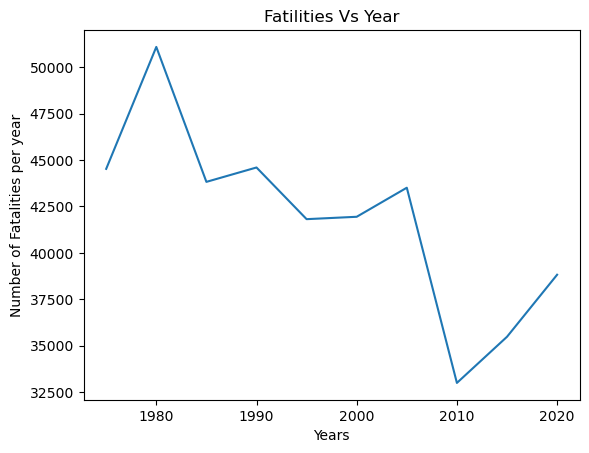

In [46]:
x = np.array(years)
y = np.array(fatilities)
plt.plot(x,y)
plt.xlabel('Years')
plt.ylabel('Number of Fatalities per year')
plt.title('Fatilities Vs Year')
plt.show()

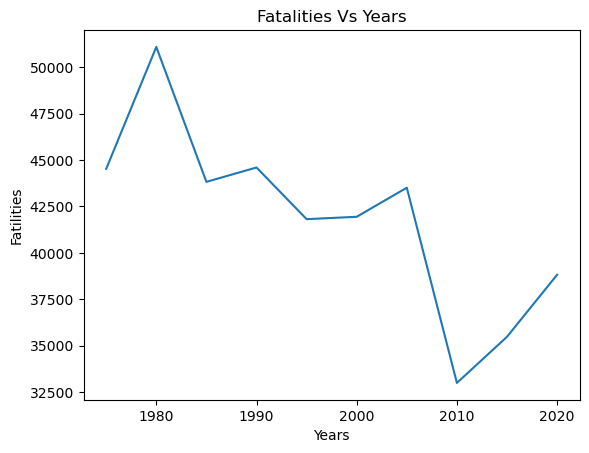

In [59]:
df = pd.DataFrame(list(zip(years, fatilities)),columns =['Years', 'Fatilities'])
snb.lineplot(data=df, x='Years', y='Fatilities').set(title="Fatalities Vs Years")   
plt.show()

In [ ]:
# Your Obersvation
As

In [89]:
# iterating over all files from 1975 to 2020
frames = []
for year in range(1975,2021,5):
    
    #generating filename with for loop
    directory = "accident_all_years"
    filename = f'{directory}/{year}_accident.csv'
    
    # open a file with panda
    df = pd.read_csv(filename,encoding='ISO-8859-1')
    frames.append(df)
    
df = pd.concat(frames)
df.shape

(376096, 113)

In [90]:
#df.loc[((df.DRUNK_DR > 0)& (df.FATALS > 0)) ,:].groupby('FATALS').agg('mean')

In [91]:
drunkDriverAccidents = 0
totalFatalAccidents = 0
drunkDriverAccidents = df.loc[((df.DRUNK_DR > 0) & (df.FATALS > 0)),:].shape[0]
totalFatalAccidents = df.loc[df.FATALS > 0,:].shape[0]
print(f'Average mean of fatal accidents due to intoxicated Driver : {drunkDriverAccidents/totalFatalAccidents:0.2f}')

Average mean of fatal accidents due to intoxicated Driver : 0.33
